#Linear Regression of Parkinson Audio Data
Author: Troy Reynolds and Kevin Nguyen

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.model_selection import train_test_split 

In [19]:
#Create the linear regression functions
class LinearReg:  
  def __init__(self, inputData, labels):
    X0 = np.ones((len(inputData), 1))
    self.X = np.append(X0, inputData, axis = 1)   #adds Xo to the front of matrix
    self.Y = labels
    self.numFeat = len(inputData[0]) + 1             #includes X0
    self.weights = (0.01)*np.ones((self.numFeat,1))      #includes X0

    self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y, test_size = 0.2, random_state=5) 

    self.regValue = 0.5 #for regularization expression enhancement

    self.costainer = [] #cost container to possibly export to graph

######### Training #############################################################
  def prediction(self):
    temp = self.weights.transpose()
    return temp.dot(self.X_train.transpose())

  def costFunction(self):
    pred = self.prediction()
    error = pred - self.Y_train.transpose()
    J = (1/(2*len(self.X_train)))*np.sum(np.square(error)) + self.regFunction()
    return J

  def gradDescent(self): #calculates changes to weights and performs gradient descent
    threshold = 0.0001
    Lrate = 0.03
    count = iterations = 150

    oldCost = self.costFunction()
    newCost = 0

    self.costainer.append(oldCost)


    print("Initial Cost | cost = " , oldCost)


    while (abs(oldCost - newCost) > threshold and iterations > 0):
      pred = self.prediction()
      error = pred - self.Y_train.transpose()

      g = Lrate/(len(self.X_train))*(error.dot(self.X_train) + self.regValue*self.weights.transpose())   #gradient with regularization parameter

      self.weights -= g.transpose()   #update weights

      oldCost = newCost
      newCost = self.costFunction()
      self.costainer.append(newCost)

      print("Iteration #" , count - iterations + 1 , "|   cost = " , newCost)
      iterations -= 1

    if iterations > 0:
      print("The gradient descent stopped before all iterations were complete because the decrease in error is less than ", threshold, ". \n")
      with np.printoptions(precision=3):
        print("Ideal Weights: ", np.array(self.weights.transpose()))

  def regFunction(self): #regularization expression
    return self.regValue*np.sum(np.square(self.weights))

########## Testing ############################################################
  def testPrediction(self): #works
    temp = self.weights.transpose()
    return temp.dot(self.X_test.transpose())

  def testCostFunction(self):
    pred = self.testPrediction()
    error = pred - self.Y_test.transpose()
    J = (1/(2*len(self.X_test)))*np.sum(np.square(error)) + self.regFunction()
    return J

  def train(self):
    print("Gradient Descent on the Training Data:")
    self.gradDescent()
    print("\n")
    print("Error value of Test data: ",self.testCostFunction())


In [21]:
#Get data from github repository and read into a dataframe
! git clone https://github.com/Tlr150130/Linear-Regression-using-Parkinsons-Telemonitoring-Data-Set
df = pd.read_csv('/content/Linear-Regression-using-Parkinsons-Telemonitoring-Data-Set/parkinsons_updrs.data')   #Input path to data

fatal: destination path 'Linear-Regression-using-Parkinsons-Telemonitoring-Data-Set' already exists and is not an empty directory.


In [6]:
df.describe() #see general information about the data set

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


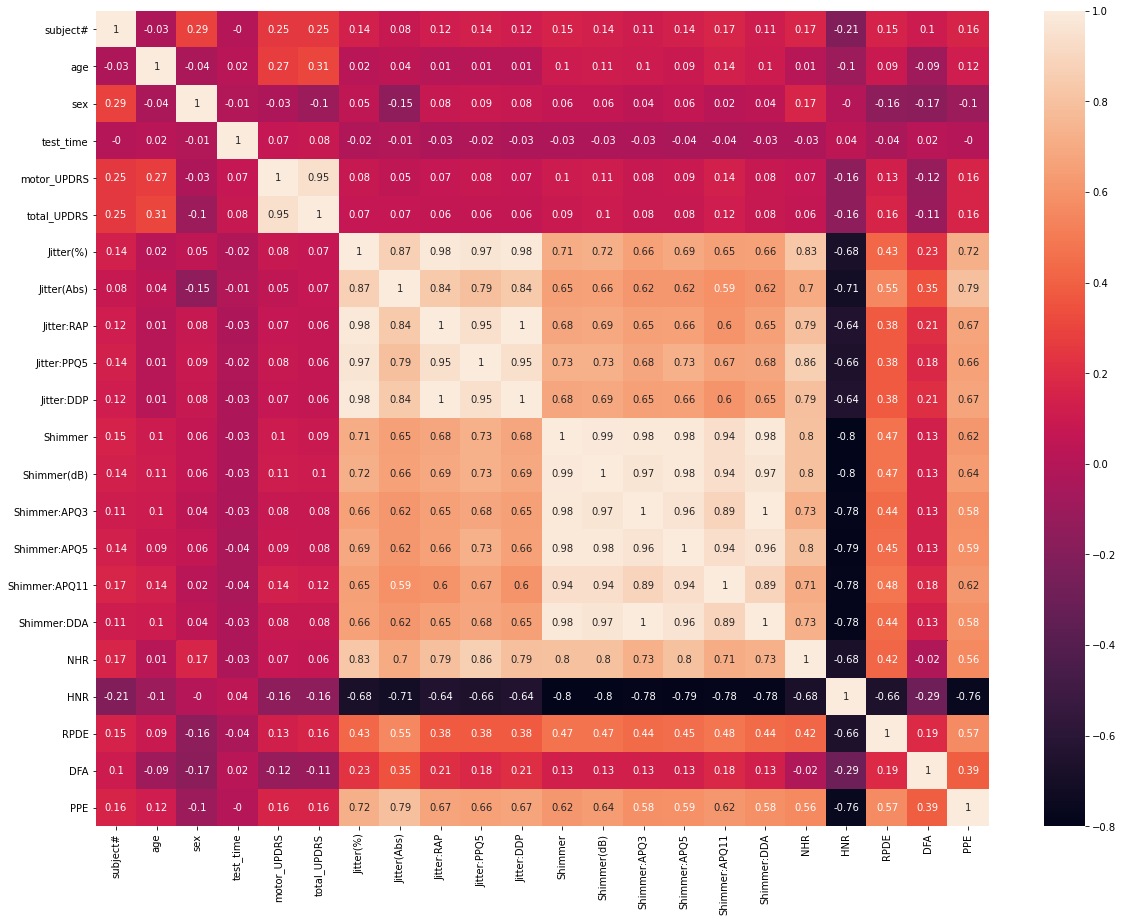

In [7]:
corr_matrix = df.corr().round(2)
plt.subplots(figsize=(20,15))
sns.heatmap(data = corr_matrix, annot = True)

In [20]:
#main

#preprocessing
df_Post=df.drop(labels= ["subject#", 'test_time', 'motor_UPDRS'],axis = 1)   #drop unnecessary variables

normDf = (df_Post - df_Post.mean())/df_Post.std()#normalization
labels = normDf[['total_UPDRS']]
data = normDf.drop(labels = ['total_UPDRS'], axis = 1)

#begin using using model
Buddy = LinearReg(data.to_numpy(), labels.to_numpy())
Buddy.train()

Gradient Descent on the Training Data:
Initial Cost | cost =  0.489956026358237
Iteration # 1 |   cost =  0.48564277702118686
Iteration # 2 |   cost =  0.4817874513039561
Iteration # 3 |   cost =  0.4783261591081861
Iteration # 4 |   cost =  0.47521483015838595
Iteration # 5 |   cost =  0.4724196184301052
Iteration # 6 |   cost =  0.4699124730686645
Iteration # 7 |   cost =  0.4676690250530063
Iteration # 8 |   cost =  0.46566752566742914
Iteration # 9 |   cost =  0.4638882724419892
Iteration # 10 |   cost =  0.4623132679473677
Iteration # 11 |   cost =  0.4609259947985005
Iteration # 12 |   cost =  0.45971125223864406
Iteration # 13 |   cost =  0.4586550279199121
Iteration # 14 |   cost =  0.45774439160002495
Iteration # 15 |   cost =  0.45696740371081196
Iteration # 16 |   cost =  0.4563130348223886
Iteration # 17 |   cost =  0.4557710936010026
Iteration # 18 |   cost =  0.455332161706374
Iteration # 19 |   cost =  0.45498753455595864
Iteration # 20 |   cost =  0.45472916717236883
It